In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

a. Đọc bộ dữ liệu MNIST từ Keras

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

b. In ra kích thước của tập train, test

In [4]:
print(f"Training data (images) shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test data (images) shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Training data (images) shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data (images) shape: (10000, 28, 28)
Test labels shape: (10000,)


c. Chuẩn hóa các giá trị pixel của ảnh về đoạn [0,1]

In [5]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# In kích thước của tập train và test
print(f"Training data shape: {train_images.shape}")
print(f"Test data shape: {test_images.shape}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


d. Chia tập train ban đầu thành tập train và tập validaion theo tỷ lệ 8:2

In [6]:
# Chia tập train thành train và validation với tỷ lệ 80:20
train_images, validation_images, train_labels, validation_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42)

In [7]:
# In kích thước của các tập dữ liệu
print(f"Training data shape: {train_images.shape}")
print(f"Validation data shape: {validation_images.shape}")

Training data shape: (48000, 28, 28)
Validation data shape: (12000, 28, 28)


e. Xây dựng Neural Network gồm các layers:

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
# Xây dựng mô hình Sequential
model = Sequential([
    # Lớp Flatten: làm phẳng dữ liệu 2D thành vector 1D
    Flatten(input_shape=(28, 28)),

    # Lớp Dense: Fully connected với 128 neurons và hàm kích hoạt ReLU
    Dense(128, activation='relu'),

    # Lớp Dropout: tắt 20% neurons
    Dropout(0.2),

    # Lớp Dense: Fully connected với số neurons = số lớp, sử dụng Softmax
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


f. Biên dịch mô hình sử dụng optimizer: adam; loss:
sparse_categorical_crossentropy; metric: accuracy

In [9]:
# Biên dịch mô hình
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

g. Huấn luyện mô hình dựa trên tập train, đánh giá với tập validation;
epoch: 5; batch_size: 32.

In [10]:
# Huấn luyện mô hình
history = model.fit(
    train_images,  # Dữ liệu huấn luyện
    train_labels,  # Nhãn huấn luyện
    epochs=5,      # Số vòng lặp huấn luyện
    batch_size=32, # Số mẫu trong mỗi lần cập nhật trọng số
    validation_data=(validation_images, validation_labels),  # Dữ liệu và nhãn validation
    verbose=1      # Hiển thị thông tin huấn luyện
)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8448 - loss: 0.5347 - val_accuracy: 0.9507 - val_loss: 0.1659
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9483 - loss: 0.1733 - val_accuracy: 0.9647 - val_loss: 0.1206
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9627 - loss: 0.1260 - val_accuracy: 0.9703 - val_loss: 0.1023
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9719 - loss: 0.0953 - val_accuracy: 0.9704 - val_loss: 0.0953
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9753 - loss: 0.0793 - val_accuracy: 0.9722 - val_loss: 0.0940


h. Vẽ biểu đồ thể hiện accuracy, loss sau mỗi epoch.

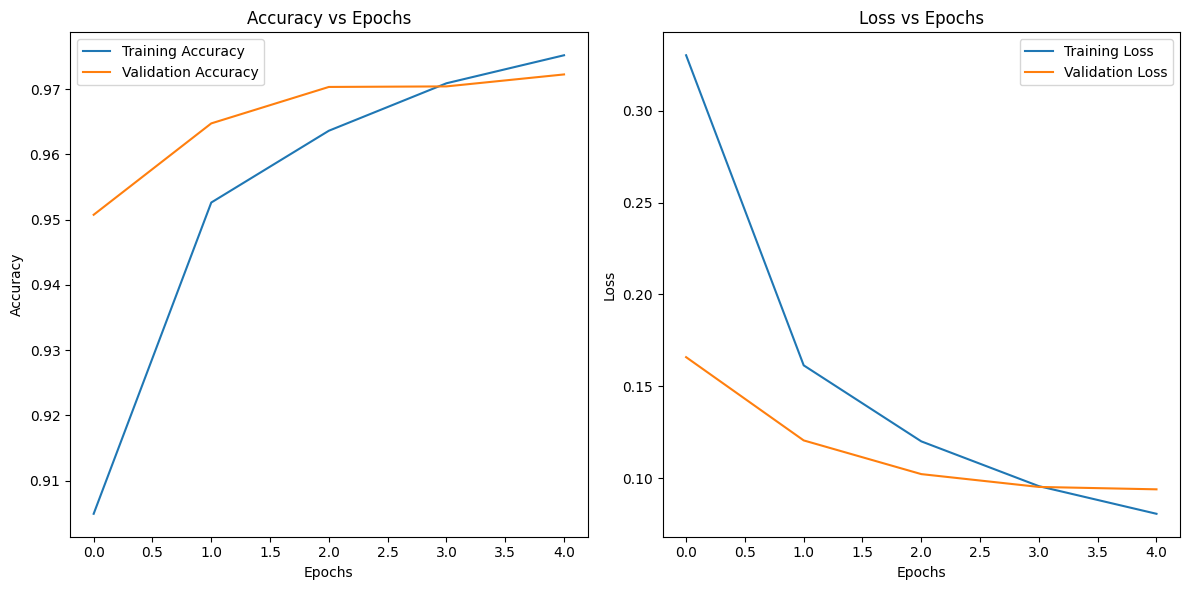

In [11]:
import matplotlib.pyplot as plt

# Lấy dữ liệu về accuracy và loss từ history
history_accuracy = history.history['accuracy']
history_val_accuracy = history.history['val_accuracy']
history_loss = history.history['loss']
history_val_loss = history.history['val_loss']

# Vẽ biểu đồ Accuracy
plt.figure(figsize=(12, 6))

# Accuracy trên train và validation
plt.subplot(1, 2, 1)
plt.plot(history_accuracy, label='Training Accuracy')
plt.plot(history_val_accuracy, label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Vẽ biểu đồ Loss
plt.subplot(1, 2, 2)
plt.plot(history_loss, label='Training Loss')
plt.plot(history_val_loss, label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Hiển thị đồ thị
plt.tight_layout()
plt.show()

i. Dự đoán phân lớp cho tập test

In [12]:
# Dự đoán xác suất cho tập test
predictions = model.predict(test_images)

# Sử dụng argmax để chọn lớp có xác suất lớn nhất cho mỗi mẫu
predicted_classes = np.argmax(predictions, axis=1)

# In ra các nhãn lớp dự đoán
print("Predicted classes:", predicted_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted classes: [7 2 1 ... 4 5 6]


j. Tính và in ra Accuracy của mô hình trên tập test

In [23]:
from sklearn.metrics import accuracy_score
# Tính và in ra Accuracy trên tập test
accuracy = accuracy_score(test_labels, predicted_classes)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Accuracy on test set: 97.21%


k. Tính và in ra Precision, Recall, F1-score của từng lớp và trung bình của
mô hình trên tập test

In [24]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(test_labels, predicted_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.97      0.96      0.97      1010
           4       0.96      0.99      0.97       982
           5       0.98      0.97      0.97       892
           6       0.99      0.97      0.98       958
           7       0.96      0.97      0.97      1028
           8       0.99      0.94      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



l. Hiển thị confusion matrix bằng heat map (bản đồ nhiệt)

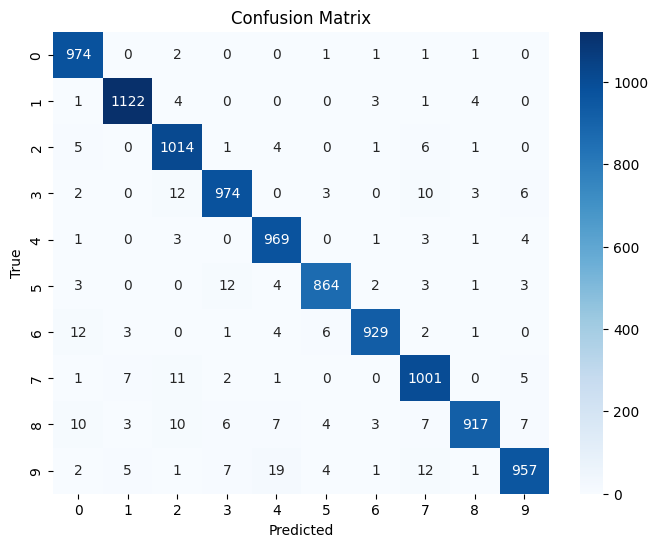

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, predicted_classes)

# Vẽ heatmap cho confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

m. In ra kết quả phân lớp của 05 ảnh đầu tiên trong tập test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


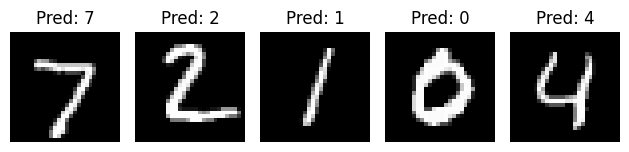

In [26]:
for i in range(5):
    # Lấy ảnh từ tập test và thêm một chiều batch (expand_dims)
    image = np.expand_dims(test_images[i], axis=0)  # Thêm chiều batch để phù hợp với đầu vào của model

    # Dự đoán lớp cho ảnh này
    prediction = model.predict(image)

    # Chọn lớp có xác suất lớn nhất
    predicted_class = np.argmax(prediction, axis=1)

    # Hiển thị ảnh và kết quả phân lớp
    plt.subplot(1, 5, i + 1)  # Sắp xếp ảnh trên 1 hàng với 5 ảnh
    plt.imshow(test_images[i], cmap='gray')  # Hiển thị ảnh
    plt.title(f"Pred: {predicted_class[0]}")  # Hiển thị lớp dự đoán
    plt.axis('off')  # Tắt trục x và y

plt.tight_layout()  # Điều chỉnh để ảnh không bị chồng chéo
plt.show()

n. In ra 05 kết quả đầu tiên phân lớp sai so với nhãn thực tế trong tập test

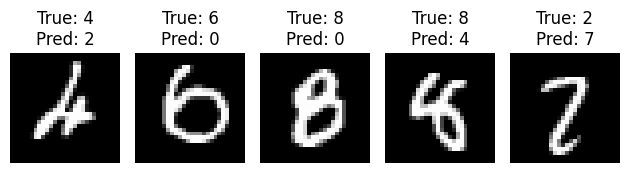

In [27]:
# Tìm các mẫu phân lớp sai
misclassified_indices = np.where(predicted_classes != test_labels)[0]

# Hiển thị 5 mẫu phân lớp sai
for i in range(5):
    index = misclassified_indices[i]

    # Lấy ảnh và nhãn thực tế
    image = test_images[index]
    true_class = test_labels[index]
    predicted_class = predicted_classes[index]

    # Hiển thị ảnh và thông tin phân lớp
    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap='gray')  # Hiển thị ảnh
    plt.title(f"True: {true_class}\nPred: {predicted_class}")  # Nhãn thực tế và dự đoán
    plt.axis('off')

plt.tight_layout()
plt.show()